In [1]:
import torch
import torch.nn as nn
import torchaudio

import math

import mne

import matplotlib.pyplot as plt

import numpy as np

from tqdm import tqdm

from utils.dataset import CustomDataset

In [2]:
device = torch.device("cuda")

num_subjects = 49
T_out = 149

bundle = torchaudio.pipelines.WAV2VEC2_XLSR53
wave2vec = bundle.get_model().to(device)

In [3]:
batch_size = 128

exclude = [2, 7, 9, 23, 24, 27, 28, 29, 30, 31, 32, 33, 43, 46, 47, 49]

dataset = CustomDataset(data_dir="./data/umich", T_out=T_out, num_subjects=num_subjects, exclude=exclude)

train_set, val_set = torch.utils.data.random_split(dataset, [0.8, 0.2])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

100%|██████████| 49/49 [01:01<00:00,  1.26s/it]
7953it [05:13, 25.35it/s]


Brain data shape: torch.Size([7953, 61, 149])
Waveform shape: torch.Size([7953, 48000])
Subject num shape: torch.Size([7953])
Audio sampling rate (Hz): 16000
Brain data sampling rate (Hz): 50


In [4]:
waveform = next(iter(train_loader))
waveform[0].shape

3679
tensor(15)
2064
tensor(8)
765
tensor(3)
1225
tensor(5)
7102
tensor(29)
777
tensor(3)
7899
tensor(32)
4755
tensor(19)
2494
tensor(10)
6297
tensor(26)
1335
tensor(5)
636
tensor(2)
6081
tensor(25)
7349
tensor(30)
7019
tensor(29)
1987
tensor(8)
6669
tensor(27)
6675
tensor(27)
1506
tensor(6)
3997
tensor(16)
7050
tensor(29)
15
tensor(0)
6298
tensor(26)
6911
tensor(28)
1830
tensor(7)
5685
tensor(23)
2061
tensor(8)
376
tensor(1)
6332
tensor(26)
902
tensor(3)
6610
tensor(27)
7925
tensor(32)
5288
tensor(21)
4336
tensor(17)
1319
tensor(5)
6604
tensor(27)
4702
tensor(19)
3097
tensor(12)
974
tensor(4)
739
tensor(3)
6828
tensor(28)
3535
tensor(14)
962
tensor(3)
3242
tensor(13)
4172
tensor(17)
938
tensor(3)
1070
tensor(4)
7267
tensor(30)
58
tensor(0)
6166
tensor(25)
28
tensor(0)
6550
tensor(27)
1779
tensor(7)
1462
tensor(6)
5152
tensor(21)
4604
tensor(19)
6143
tensor(25)
372
tensor(1)
2297
tensor(9)
7639
tensor(31)
6749
tensor(28)
1513
tensor(6)
2996
tensor(12)
6898
tensor(28)
3318
tensor(13)
38

torch.Size([128, 61, 149])

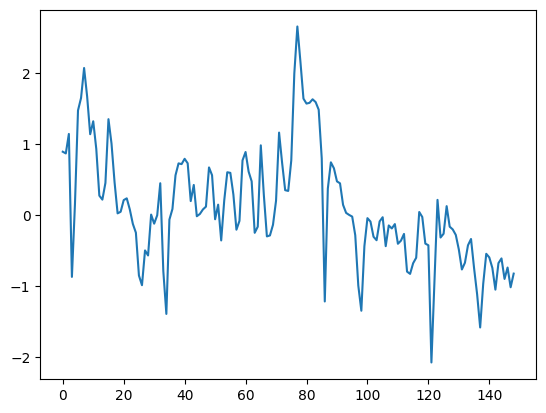

In [6]:
plt.plot(waveform[0][2][0])